In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("spam.csv",encoding='latin-1') #ing. olmayan karakterler var karakterleri tanıması için encodind="latin-1 diyoruz"

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True) #gereksiz sütunları sildik

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.columns=["Class","Text"] #v1 ve v2 yi class ve text olarak değiştirdik

In [8]:
df.head()

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.shape #5572 mesaj

(5572, 2)

In [10]:
df["Label"]=df["Class"].map({"ham":0,"spam":1}) #ham=0 spam yerine 1

In [11]:
df.head()

,Class,Text,Label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


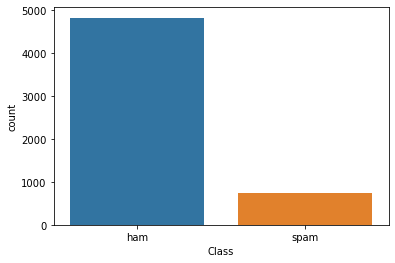

In [12]:
sns.countplot(x=df["Class"]);

In [13]:
df['Text']=df['Text'].str.lower()
df['Text']=df['Text'].str.replace('[^\w\s]','')
df['Text']=df['Text'].str.replace('\d+','')
df['Text']=df['Text'].str.replace('\n',' ').replace('\r',"")

In [14]:
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np


In [16]:
def wc(data,bgcolor): 
    plt.figure(figsize=(10,10))
    wc=WordCloud(background_color=bgcolor, stopwords=STOPWORDS)
    wc.generate(' '.join(data))
    plt.imshow(wc) 
    plt.axis("off")

def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    wc=WordCloud(background_color=bgcolor, stopwords=STOPWORDS)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis("off")

In [17]:
ham=df[df["Class"]=='ham']["Text"] #ham olanları aldı

In [18]:
spam=df[df["Class"]=='spam']["Text"] #spam olanları aldı

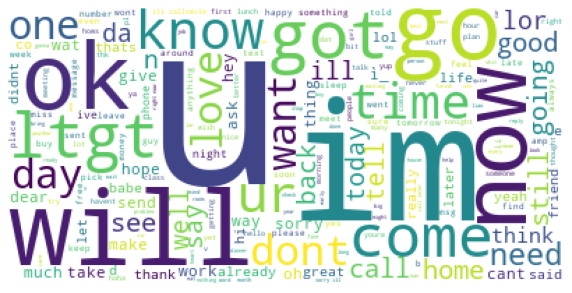

In [19]:
wc(ham,'white')

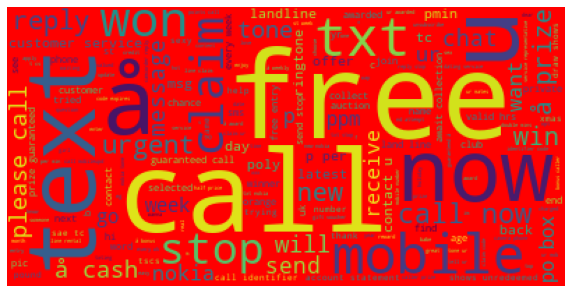

In [20]:
wc(spam,'red')

In [21]:
def sc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open("alice_mask.png"))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis("off")

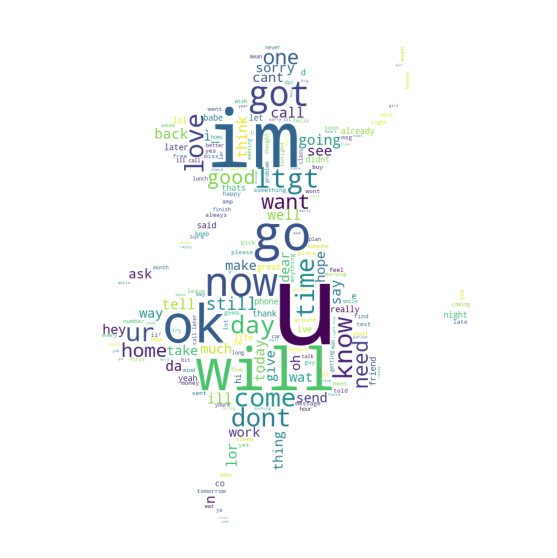

In [22]:
sc(ham,'white')

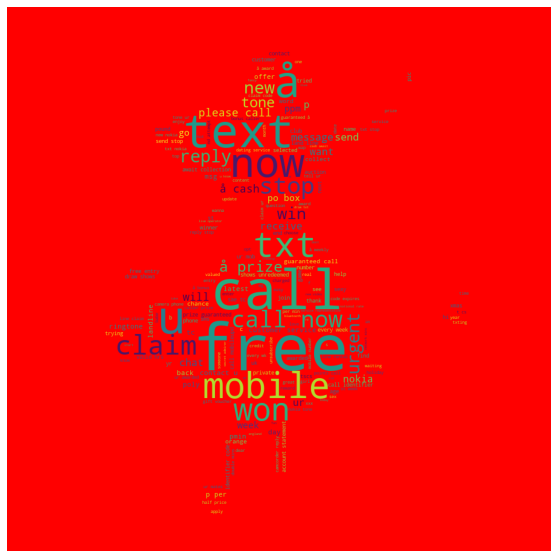

In [23]:
sc(spam,'red')

In [24]:
x=df["Text"]
y=df["Label"]

In [25]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [26]:
vect=CountVectorizer(stop_words="english")

In [27]:
x=vect.fit_transform(x)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.15)

In [29]:
mb=MultinomialNB()

In [30]:
tahmin=mb.fit(x_train,y_train).predict(x_test)

In [31]:
accuracy_score(tahmin,y_test)

0.972488038277512

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
d=DecisionTreeClassifier()

In [34]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
tahmin2=d.predict(x_test)

In [36]:
accuracy_score(tahmin2,y_test)

0.9641148325358851